# Importación de bibliotecas necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Tarea 1: Contar píxeles blancos por filas. Determinar el valor máximo de los píxeles blancos para filas,mostrando el número de filas y sus respectivas posiciones, con un número de píxeles mayor o igual que el 90% del máximo.

## Cargar imagen de disco y aplicar la función Canny

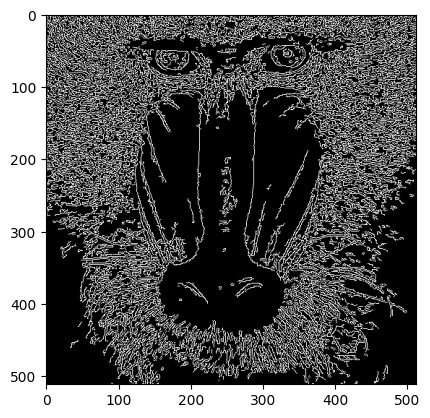

In [2]:
image = cv2.imread("imgs/mandril.jpg", cv2.IMREAD_COLOR_RGB)
canny = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), 100, 200)
plt.imshow(canny, cmap='gray') 
plt.show()

## Reducir por filas obteniendo su ratio de píxeles blancos, el valor de la fila con mayor número de estos y conteo de aquellas que tienen un valor de píxeles blancos mayor o igual al 90% del máximo

Fila con el mayor número de píxeles blancos: 12
Valor máximo de píxeles blancos en una fila: 56100
Filas con píxeles blancos mayor o igual al 90% del máximo: {6: 51765, 12: 56100, 15: 52020, 20: 51000, 21: 51255, 88: 50745, 100: 54060}


(0.0, 512.0)

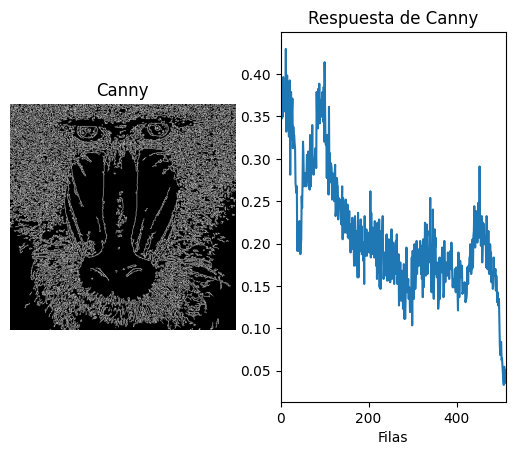

In [3]:
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()

rows_ratio = row_counts / (255 * canny.shape[1])

max_index = np.argmax(row_counts)
max_fill = row_counts[max_index]
rows_task1 = {i: int(row_counts[i]) for i in range(len(row_counts)) if row_counts[i] >= 0.9 * max_fill}

print(f"Fila con el mayor número de píxeles blancos: {max_index}")
print(f"Valor máximo de píxeles blancos en una fila: {max_fill}")
print(f"Filas con píxeles blancos mayor o igual al 90% del máximo: {rows_task1}")

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_ratio)
plt.xlim([0, canny.shape[1]])

# Tarea 2: Aplicar umbralizado a la imagen resultante de Sobel, y posteriormente realiar conteo de filas y columnas no nulos. Calcular el valor máximo de la cuenta por filas y columnas y determinar aquellas por encima del 90% del máximo. Remarcar dichas filas y columnas en la imagen

## Aplicar Sobel

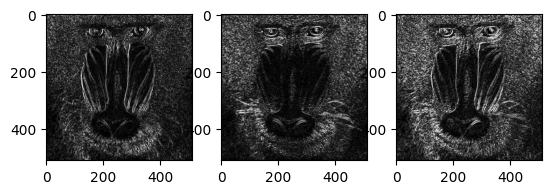

In [4]:
gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), (3, 3), 0)
sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
sobel = cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))

plt.figure()

plt.subplot(1, 3, 1)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(sobel, cmap='gray')

# Calcular histograma para identificar el umbral correcto

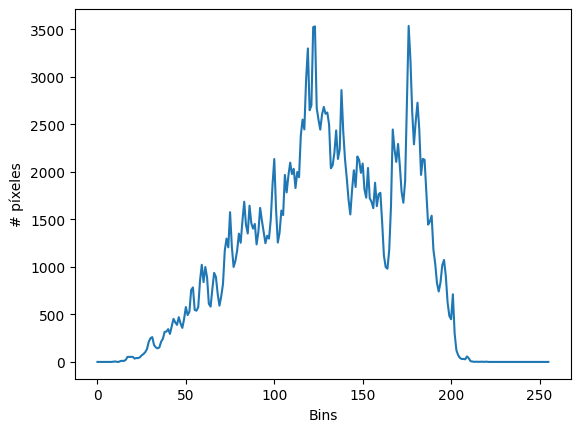

In [5]:
histogram = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)], [0], None, [256], [0, 256])

plt.figure()
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(histogram)

## Umbralizado de la imagen

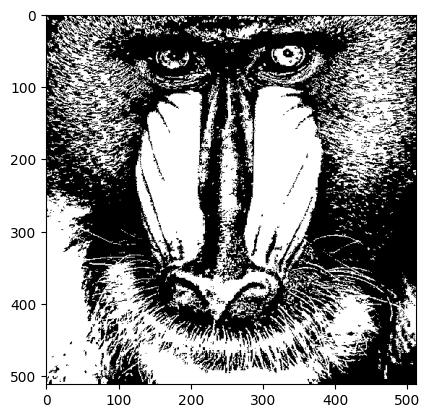

In [8]:
threshold = 130

_, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), threshold, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap='gray')

## Conteo de filas y columnas con valores de píxeles no nulos

In [9]:
row_counts = np.count_nonzero(threshold_image, axis=1)
max_row_index = np.argmax(row_counts)
max_row_value = row_counts[max_row_index]
rows = {i: int(row_counts[i]) for i in range(len(row_counts)) if row_counts[i] > .9*max_row_value}

col_counts = np.count_nonzero(threshold_image, axis=0)
max_col_index = np.argmax(col_counts)
max_col_value = col_counts[max_col_index]
cols = {i: int(col_counts[i]) for i in range(len(col_counts)) if col_counts[i] > .9*max_col_value}

## Remarcando con gráficas dichos valores en la imagen del mandril

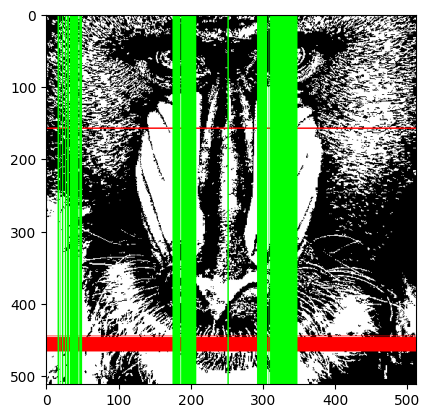

In [10]:
h, w = threshold_image.shape
threshold_image = cv2.cvtColor(threshold_image, cv2.COLOR_GRAY2RGB)

for row, value in rows.items():
    cv2.line(threshold_image, (0, row), (w, row), (255, 0, 0), 1)

for col, value in cols.items():
    cv2.line(threshold_image, (col, 0), (col, h), (0, 255, 0), 1)

plt.imshow(threshold_image, cmap='gray')

# Tarea 3: Demostrador

## Clase realizada con las funciones del demostrador

In [2]:
from enum import Enum

class Demo(Enum):
    NEGATIVE = 0
    INVERT_GREEN = 1
    INVERT_RED = 2
    INVERT_BLUE = 3
    CANNY = 4
    ISOLATE = 5
    SOBEL = 6
    THRESHOLD = 7

    @classmethod
    def apply_transformation(cls, image, transformation):
        methods_map = {
            cls.NEGATIVE: cls.negative_image,
            cls.INVERT_GREEN: cls.invert_green,
            cls.INVERT_RED: cls.invert_red,
            cls.INVERT_BLUE: cls.invert_blue,
            cls.CANNY: cls.canny,
            cls.ISOLATE: cls.isolate_color,
            cls.SOBEL: cls.sobel,
            cls.THRESHOLD: cls.threshold_function
        }
        if transformation in methods_map:
            return methods_map[transformation](image)
        else:
            raise ValueError(f"Transformación {transformation} no válida")

    @staticmethod
    def negative_image(image):
        return 255 - image
    
    @staticmethod
    def invert_green(image):
        image = image.copy()
        image[:,:,1] = 255 - image[:,:,1]
        return image

    @staticmethod
    def invert_red(image):
        image = image.copy()
        image[:,:,2] = 255 - image[:,:,2]
        return image

    @staticmethod
    def invert_blue(image):
        image = image.copy()
        image[:,:,0] = 255 - image[:,:,0]
        return image
    
    @staticmethod
    def change_color_percentage(image, r=1, g=1, b=1):
        image = image.copy()
        image[:,:,0] = (image[:,:,0] * r) if r != -1 else 255 - image[:,:,0]
        image[:,:,1] = (image[:,:,1] * g) if g != -1 else 255 - image[:,:,1]
        image[:,:,2] = (image[:,:,2] * b)if b != -1 else 255 - image[:,:,2]
        return image
    
    @staticmethod
    def canny(image):
        return Demo.negative_image(cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 50, 200))
    
    @staticmethod
    def sobel(image):
        gaussian_image = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (3, 3), 0)
        sobel_y = cv2.Sobel(gaussian_image, cv2.CV_64F, 0, 1)
        sobel_x = cv2.Sobel(gaussian_image, cv2.CV_64F, 1, 0)
        return cv2.convertScaleAbs(cv2.add(sobel_x, sobel_y))
    
    @staticmethod
    def isolate_color(image):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (20, 100, 70), (65, 255, 255))
        return cv2.bitwise_and(image, image, mask=mask)
    
    @staticmethod
    def threshold_function(image):
        threshold = 130
        threshold, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), threshold, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        threshold, threshold_image = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), threshold, 255, cv2.THRESH_BINARY)
        return threshold_image

## Clase realizada para la interfaz del demostrador

In [5]:
import tkinter as tk
from PIL import Image, ImageTk

class Demostrator:
    def __init__(self, root):
        self.root = root
        self.root.title("Video con Controles")

        self.video = cv2.VideoCapture(0)
        self.current_method = Demo.NEGATIVE

        self.methods_map = {
            "1": Demo.NEGATIVE,
            "2": Demo.INVERT_GREEN,
            "3": Demo.INVERT_BLUE,
            "4": Demo.INVERT_RED,
            "5": Demo.CANNY,
            "6": Demo.ISOLATE,
            "7": Demo.SOBEL,
            "8": Demo.THRESHOLD
        }

        self.method_label = tk.Label(self.root, text=self.current_method)
        self.method_label.pack()

        self.video_label = tk.Label(self.root)
        self.video_label.pack()

        instrucciones = (
            "1 - NEGATIVE\n"
            "2 - INVERT_GREEN\n"
            "3 - INVERT_BLUE\n"
            "4 - INVERT_RED\n"
            "5 - CANNY\n"
            "6 - ISOLATE\n"
            "7 - SOBEL\n"
            "8 - THRESHOLD\n"
            "ESC - Salir"
        )

        self.info_label = tk.Label(self.root, text=instrucciones, font=("Arial", 12))
        self.info_label.pack(pady=10)

        self.root.bind("<Key>", self.key_press)

        self.update_frame()

    def key_press(self, event):
        key = event.keysym
        if key in self.methods_map:
            self.current_method = self.methods_map[key]
            self.method_label.configure(text=self.current_method)
        elif key == "Escape":
            self.video.release()
            self.root.destroy()

    def update_frame(self):
        ret, frame = self.video.read()

        if not ret:
            return

        frame = cv2.flip(frame, 1)
        transformed = Demo.apply_transformation(frame, self.current_method)
        img_rgb = cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk = ImageTk.PhotoImage(image=img_pil)

        self.video_label.imgtk = img_tk
        self.video_label.configure(image=img_tk)

        self.root.after(10, self.update_frame)


if __name__ == "__main__":
    root = tk.Tk()
    app = Demostrator(root)
    root.mainloop()


# Tarea 4: Reinterpretación de Air Guitar (pincel virtual)

In [ ]:
cap = cv2.VideoCapture(0)
canvas = None
last_coords = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    
    if canvas is None:
        canvas = np.zeros_like(frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    mask1 = cv2.inRange(hsv, (0,100,100), (10,255,255))
    mask2 = cv2.inRange(hsv, (160,100,100), (179,255,255))
    mask = cv2.bitwise_or(mask1, mask2)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        c = max(contours, key=cv2.contourArea)
        if cv2.contourArea(c) > 500:
            x,y,w,h = cv2.boundingRect(c)
            cx = x + w//2
            cy = y

            cv2.circle(frame, (cx, cy), int(h*0.15), (0,255,0), -1)
            cv2.circle(canvas, (cx, cy), int(h*0.15), (0,0,255), -1)
            if last_coords:
                cv2.line(canvas, (last_coords[0], last_coords[1]), (cx, cy), (0, 0, 255), int(h*0.15))
            cv2.line(frame, (x + w//2, y), (x + w//2, y + h), (0, 255, 0), 3)
            last_coords = (cx, cy)
        else:
            last_coords = None

    combined = cv2.add(frame, canvas)

    cv2.imshow("Pincel", combined)
    cv2.imshow("Mascara", mask)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()